(30000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 average_pooling2d (Average  (None, 15, 15, 256)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 128)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 average_pooling2d_2 (Avera  (None, 2

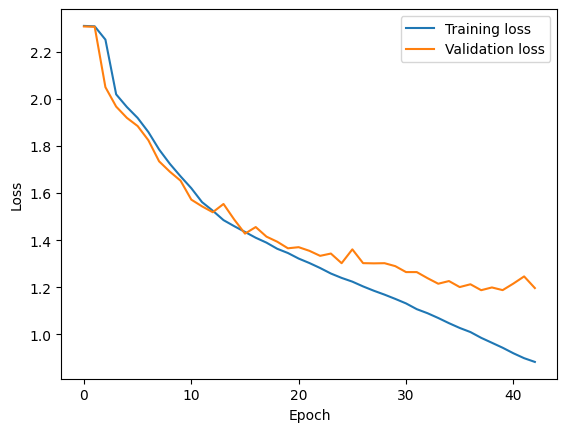

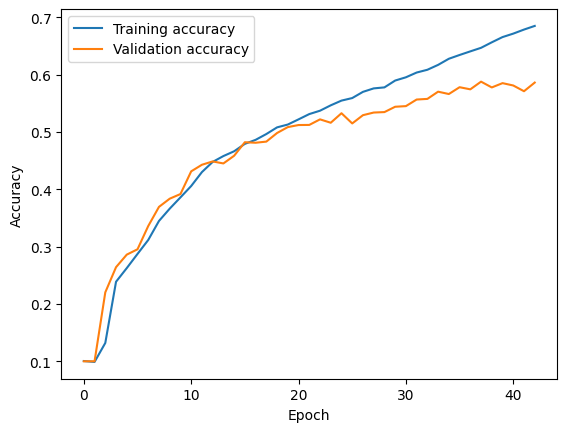

313/313 [==============================] - 34s 109ms/step - loss: 1.1874 - accuracy: 0.5879
Test accuracy: 58.79%
313/313 [==============================] - 35s 111ms/step - loss: 1.2025 - accuracy: 0.5822
Accuracy on additional test data: [1.2024807929992676, 0.5821999907493591]


In [4]:
# 3 batches

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model



# Load and preprocess dataset

train1 = pd.read_pickle('/content/drive/MyDrive/AIP/Assignment_1/q2/cifar-10/train/data_batch_1')
train2 = pd.read_pickle('/content/drive/MyDrive/AIP/Assignment_1/q2/cifar-10/train/data_batch_2')
train3 = pd.read_pickle('/content/drive/MyDrive/AIP/Assignment_1/q2/cifar-10/train/data_batch_3')
image1 = train1['data']
s1=np.shape(image1)
image_new1=image1.reshape(s1[0],3,32,32);
image_new1=image_new1.transpose(0,2,3,1);
image2 = train2['data']
s2=np.shape(image2)
image_new2=image2.reshape(s2[0],3,32,32);
image_new2=image_new2.transpose(0,2,3,1);
image3 = train3['data']
s3=np.shape(image3)
image_new3=image3.reshape(s3[0],3,32,32);
image_new3=image_new3.transpose(0,2,3,1);
## Final training data
train_images = np.append(image_new1, image_new2, axis=0)
train_images = np.append(train_images, image_new3, axis=0)

train_images=train_images/ 255
print(np.shape(train_images));

train_labels1=train1['labels'];
train_labels2=train2['labels'];
train_labels3=train3['labels'];
train_labels=np.append(train_labels1,train_labels2)
train_labels=np.append(train_labels,train_labels3)

test = pd.read_pickle('/content/drive/MyDrive/AIP/Assignment_1/q2/cifar-10/test/test_batch')
image4 = test['data']
s4=np.shape(image4)
image_new4=image4.reshape(s4[0],3,32,32);
image_new4=image_new4.transpose(0,2,3,1); ## Final test data
test_images=image_new4/255;
test_labels=test['labels'];


train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
# Additional test data
test2=np.load('/content/drive/MyDrive/AIP/Assignment_1/q2/test_additional.npy')
test2=test2/255
test_labels_2=np.load('/content/drive/MyDrive/AIP/Assignment_1/q2/labels.npy')
test_labels_2 = to_categorical(test_labels_2, 10)

# Define the CNN architecture
model = models.Sequential()
act=['sigmoid','relu']
activation=act[0]

# Convolutional layer with 256 filters, each of size 3x3
model.add(layers.Conv2D(256, (3, 3), activation=activation, input_shape=(32, 32, 3)))
# AveragePooling layer with pool size 2x2
model.add(layers.AveragePooling2D((2, 2)))
# Convolutional layer with 64 filters, each of size 3x3,
model.add(layers.Conv2D(128, (3, 3), activation=activation))
# AveragePooling layer with pool size 2x2
model.add(layers.AveragePooling2D((2, 2)))
# Convolutional layer with 128 filters, each of size 3x3
model.add(layers.Conv2D(128, (3, 3), activation=activation))
# AveragePooling layer with pool size 2x2
model.add(layers.AveragePooling2D((2, 2)))
# Flatten layer to flatten the output for the fully connected layer
model.add(layers.Flatten())
# FC layers
model.add(layers.Dense(128, activation=activation))
model.add(layers.Dense(64, activation=activation))
# Output layer with 10 neurons (for 10 classes) and 'softmax' activation function
model.add(layers.Dense(10, activation='softmax'))

# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Monitor Validation loss to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.00001,restore_best_weights=True)

# Train the model on the training data
history=model.fit(train_images, train_labels,batch_size=32, epochs=100, validation_data=(test_images, test_labels),callbacks=[early_stopping])
model1 = save_model(model, 'model1')

# Plot loss vs epoch
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Prediction for additional test data
predictions = model.predict(test2)

accuracy = model.evaluate(test2, test_labels_2)
print(f'Accuracy on additional test data: {accuracy}')

